# Problema de Negócio:

📝Quais gêneros de animes tendem a receber notas mais altas?

# Importando Libs

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Carregando Dataset

In [134]:
anime = pd.read_csv("animes.csv")


# Analisando os Dados

In [135]:
anime.shape

(15262, 27)

In [136]:
anime.head()

,Japanese,Type,Episodes,Status,Aired,Premiered,Producers,Licensors,Studios,Source,...,Favorites,description,Name,English Name,Recommended,Mixed Feelings,Not Recommended,Themes,Demographics,Seasonal
0,葬送のフリーレン,TV,28,Finished Airing,"Sep 29, 2023 to Mar 22, 2024",Fall 2023,"Aniplex, Dentsu, Shogakukan-Shueis...","None found, add some",Madhouse,Manga,...,43111,During their decade-long quest to defeat the D...,Sousou no Frieren,Frieren: Beyond Journey's End,493,67,42,['Unknown-Themes'],['Shounen'],False
1,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,"Aniplex, Square Enix, Mainichi Bro...","Funimation, Aniplex of America",Bones,Manga,...,226182,After a horrific alchemy experiment goes wrong...,Fullmetal Alchemist: Brotherhood,NaN,912,59,39,['Military'],['Shounen'],False
2,STEINS;GATE,TV,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,"Frontier Works, Media Factory, Kad...",Funimation,White Fox,Visual novel,...,189734,Eccentric scientist Rintarou Okabe has a never...,Steins;Gate,NaN,1006,73,73,"['Psychological', 'TimeTravel']",['Unknown-Demographic'],True
3,銀魂°,TV,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,"TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,...,16680,"Gintoki, Shinpachi, and Kagura return as the f...",Gintama°,Gintama Season 4,79,3,1,"['GagHumor', 'Historical', 'Parody', 'Samurai']",['Shounen'],False
4,進撃の巨人 Season3 Part.2,TV,10,Finished Airing,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,"Production I.G, Dentsu, Mainichi B...",Funimation,Wit Studio,Manga,...,58793,Seeking to restore humanity's diminishing hope...,Shingeki no Kyojin Season 3 Part 2,Attack on Titan Season 3 Part 2,198,9,11,"['Gore', 'Military', 'Survival']",['Shounen'],True


In [137]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15262 entries, 0 to 15261
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Japanese         15047 non-null  object 
 1   Type             15262 non-null  object 
 2   Episodes         15262 non-null  object 
 3   Status           15262 non-null  object 
 4   Aired            15262 non-null  object 
 5   Premiered        5527 non-null   object 
 6   Producers        15262 non-null  object 
 7   Licensors        15262 non-null  object 
 8   Studios          15253 non-null  object 
 9   Source           15262 non-null  object 
 10  Genres           15262 non-null  object 
 11  Duration         15262 non-null  object 
 12  Rating           15262 non-null  object 
 13  Score            15262 non-null  float64
 14  Ranked           15262 non-null  int64  
 15  Popularity       15262 non-null  int64  
 16  Members          15262 non-null  int64  
 17  Favorites   

🔎Dectando Valores Duplicados

In [138]:
# Verificar se há linhas duplicadas
anime.duplicated().sum()

3

🔎Dectando Valores Ausentes

In [139]:
valAusentes = anime.isnull().sum().sort_values(ascending = False)

print(valAusentes)

Premiered          9735
English Name       8422
Japanese            215
Studios               9
Popularity            0
Demographics          0
Themes                0
Not Recommended       0
Mixed Feelings        0
Recommended           0
Name                  0
description           0
Favorites             0
Members               0
Score                 0
Ranked                0
Type                  0
Rating                0
Duration              0
Genres                0
Source                0
Licensors             0
Producers             0
Aired                 0
Status                0
Episodes              0
Seasonal              0
dtype: int64


In [140]:
# Calculando o percentual de valores ausentes
valores_ausentes_percent = valAusentes[valAusentes > 0] / anime.shape[0] 

print(f'{valores_ausentes_percent * 100} %')

Premiered       63.785873
English Name    55.182807
Japanese         1.408728
Studios          0.058970
dtype: float64 %


> 📄Vamos criar um DataFrame novo e deixar apenas as colunas que precisamos

In [141]:
df_anime = anime[['Score', 'Name', 'Genres']]

df_anime.sample(10)

,Score,Name,Genres
14096,0.000,Tu Bo Shu de Shenghuo,['Unknown-Genre']
4503,6.931,Tantei Opera Milky Holmes: Summer Special,"['Comedy', 'Mystery']"
13557,0.000,Songdai Zuqiu Xiaojiang,['Sports']
4299,6.981,Lupin III: Nusumareta Lupin,"['Action', 'Adventure', 'Comedy', 'Mystery']"
1038,7.781,Giant Robo the Animation: Chikyuu ga Seishi Su...,"['Action', 'Drama', 'Sci-Fi']"
14007,0.000,Tokusou Kihei Dorvack OVA,"['Action', 'Comedy', 'Sci-Fi']"
5498,6.731,Hananoi-kun to Koi no Yamai,['Romance']
9338,6.031,Heart no Kuni no Alice: Wonderful Wonder World,"['Fantasy', 'Romance']"
6669,6.521,.hack//Intermezzo,"['Adventure', 'Fantasy', 'Mystery', 'Sci-Fi']"
4849,6.861,Kiteretsu Daihyakka,"['Comedy', 'Drama']"


🔎Verificando se tem valores nulos no novo DataFrame

In [142]:
valAusentes = df_anime.isnull().sum().sort_values(ascending = False)

print(valAusentes)

Score     0
Name      0
Genres    0
dtype: int64


🔎Verificando se tem valores duplicados novo DataFrame

In [143]:
# Verificar se há linhas duplicadas
df_anime.duplicated().sum()

3

In [144]:
df_anime[df_anime.duplicated()]

,Score,Name,Genres
6860,6.491,Garouden: The Way of the Lone Wolf,['Action']
10450,5.801,Z/X: Code Reunion,"['Fantasy', 'Sci-Fi']"
10451,5.801,Zegapain ADP,"['Action', 'Romance', 'Sci-Fi']"


# Limpeza e Tratamento dos Dados

> 📄Como encontramos valores duplicados, precisamos trata-los

In [145]:
df_anime.shape

(15262, 3)

In [146]:
#Removendo as duplicatas
df_anime = df_anime.drop_duplicates()

In [147]:
#Verificando se as duplicatas foram removidas
df_anime.duplicated().sum()

0

In [148]:
#Verificando valores ausentes
valAusentes = df_anime.isnull().sum().sort_values(ascending = False)

print(valAusentes)

Score     0
Name      0
Genres    0
dtype: int64


In [149]:
df_anime.shape

(15259, 3)

# Análise dos Dados

In [150]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15259 entries, 0 to 15261
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Score   15259 non-null  float64
 1   Name    15259 non-null  object 
 2   Genres  15259 non-null  object 
dtypes: float64(1), object(2)
memory usage: 476.8+ KB


In [151]:
# Função para limpar os gêneros: remover aspas, colchetes e espaços extras
def clean_genres(genres):
    # Usar regex para remover colchetes, aspas e espaços
    genres_clean = re.sub(r"[\[\]\' ]", "", genres)
    return genres_clean

# Aplicar a função de limpeza na coluna de 'Genres'
df_anime['Genres'] = df_anime['Genres'].apply(clean_genres)

# Agora recriar as colunas de gêneros corretamente
df_genres = df_anime['Genres'].str.get_dummies(sep=',')  # Separar gêneros pela vírgula

# Concatenar novamente com o DataFrame original
df = pd.concat([df_anime, df_genres], axis=1)

# Mostrar as primeiras linhas para confirmar que deu certo
df.head()


,Score,Name,Genres,Action,Adventure,AvantGarde,AwardWinning,BoysLove,Comedy,Drama,...,Gourmet,Horror,Mystery,Romance,Sci-Fi,SliceofLife,Sports,Supernatural,Suspense,Unknown-Genre
0,9.361,Sousou no Frieren,"Adventure,Drama,Fantasy",0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,9.091,Fullmetal Alchemist: Brotherhood,"Action,Adventure,Drama,Fantasy",1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,9.071,Steins;Gate,"Drama,Sci-Fi,Suspense",0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,9.061,Gintama°,"Action,Comedy,Sci-Fi",1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,9.051,Shingeki no Kyojin Season 3 Part 2,"Action,Drama,Suspense",1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [152]:
# Agora, calcular a mediana do score por gênero
genre_median_scores = {}
for genre in df_genres.columns:
    genre_median_scores[genre] = df.loc[df[genre] == 1, 'Score'].median()

In [153]:
# Converter para DataFrame para plotagem
df_median_scores = pd.DataFrame(list(genre_median_scores.items()), columns=['Genre', 'Median_Score'])

# Ordenar os dados por 'Median_Score' em ordem decrescente
df_median_scores_sorted = df_median_scores.sort_values(by='Median_Score', ascending=False)

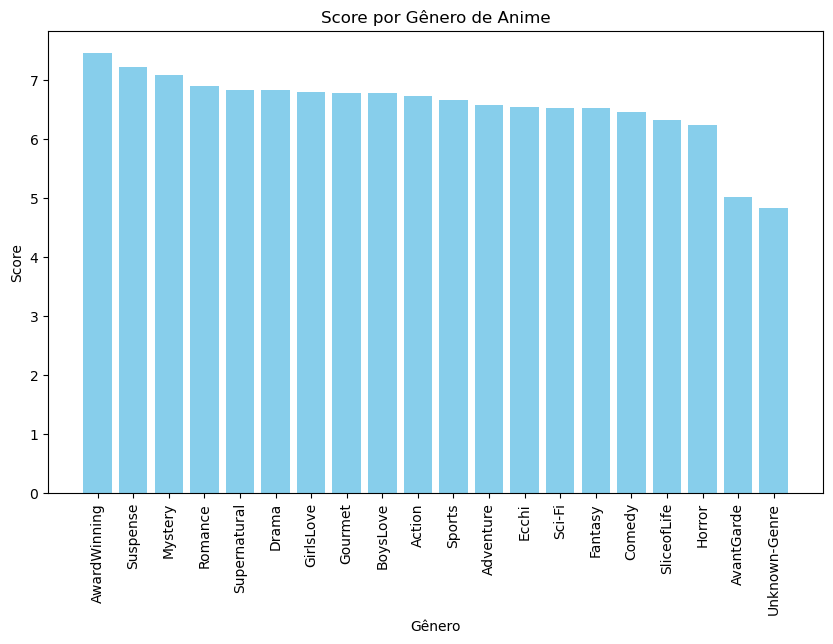

In [154]:
# Plotar o gráfico com os dados ordenados
plt.figure(figsize=(10,6))
plt.bar(df_median_scores_sorted['Genre'], df_median_scores_sorted['Median_Score'], color='skyblue')
plt.title('Score por Gênero de Anime')
plt.xlabel('Gênero')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.show()

# Conclusão
📝Quais gêneros de animes tendem a receber notas mais altas?

Após a análise dos dados e do gráfico concluímos que os gêneros de animes que tendem a receber notas mais altas são:
- Animes que foram premiados no Award Winning 
- Animes de Suspense 
- Animes de Mistério